2023/01/06

もうちょっと良い例を作りたい．

# 独立成分分析 independent component analysis; ICA

- 観測信号 $x_1(t), x_2(t), ..., x_M(t)$ は，本来独立な原信号 $s_1(t), s_2(t), ..., s_N(t)$ が混合して観測されると仮定する．
$$
\bm{X} = \bm{A} \bm{S} \in \mathbb{R}^{M \times T}
$$
- 混合行列 $\bm{A}$ の逆行列を推定できれば，信号源 $\bm{S}$ が推定できる．

## 独立と無相関

- **独立** $p(s_1, s_2) = p(s_1)p(s_2)$
  - 2つの信号は完全に独立に発生している．
- **無相関** $\langle \bm{s_1}, \bm{s_2} \rangle = 0$
  - ⇔共分散が0⇔直交
- 独立⇒無相関
  - 逆は必ずしも成り立たない．
  - 観測結果が無相関なだけでは，変数間に依存関係が無いとは限らない．
  - PCAは信号（説明変数）間を無相関にする．
- 参考
  - 減次法によるICAのNumPy実装：https://www.slideshare.net/sfchaos/numpy-scipy-9039097

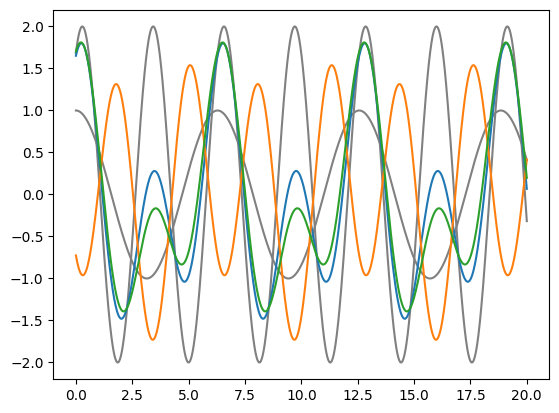

In [102]:
# 信号を用意
import numpy as np
import matplotlib.pyplot as plt

# 時刻
t = np.linspace(0, 20, 1000)

# 原信号
s1 = np.cos(t)
s2 = 2 * np.sin(2 * t + 1)
S = np.c_[s1, s2]

# 混合信号：2つの信号源から3つの観測信号を混成
H = np.random.randn(2, 3)
X = S @ H
# 標準化しておく
X = (X - X.mean(0)) / X.std(0)

plt.plot(t, S, "gray")
plt.plot(t, X)
plt.show()

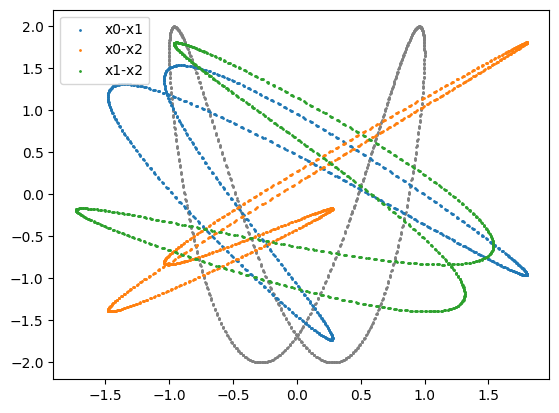

In [103]:
# 信号間の分布
plt.scatter(s1, s2, 1, "gray")
plt.scatter(X[:, 0], X[:, 1], 1, label=f"x{0}-x{1}")
plt.scatter(X[:, 0], X[:, 2], 1, label=f"x{0}-x{2}")
plt.scatter(X[:, 1], X[:, 2], 1, label=f"x{1}-x{2}")
plt.legend()

PCAの場合

In [ ]:
from sklearn.decomposition import PCA, FastICA

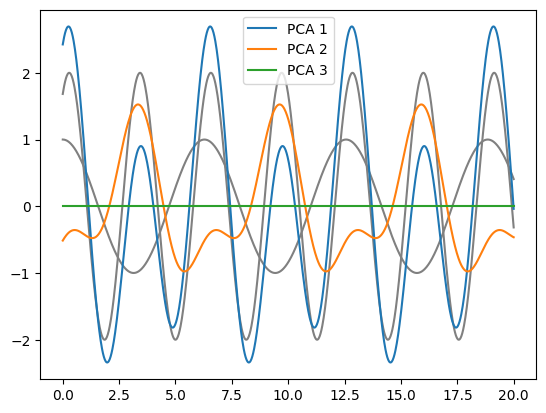

In [104]:
X_pca = PCA().fit_transform(X)

# 2つの成分に圧縮しており，周波数成分もだいたい一致しているが，位相と振幅が違う
plt.plot(t, S, "gray")
plt.plot(t, X_pca, label=["PCA 1", "PCA 2", "PCA 3"])
plt.legend()
plt.show()

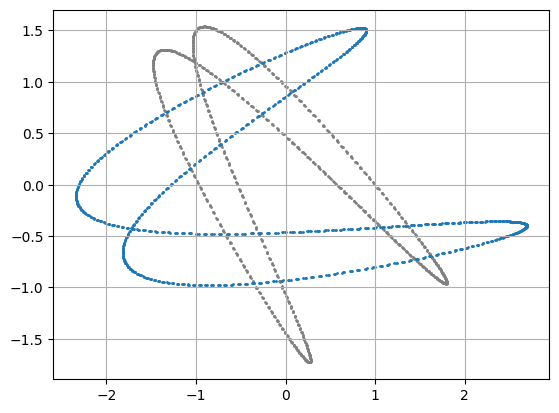

In [105]:
plt.scatter(X[:, 0], X[:, 1], 1, c="gray")
plt.scatter(X_pca[:, 0], X_pca[:, 1], 1)
plt.grid()

ICAの場合

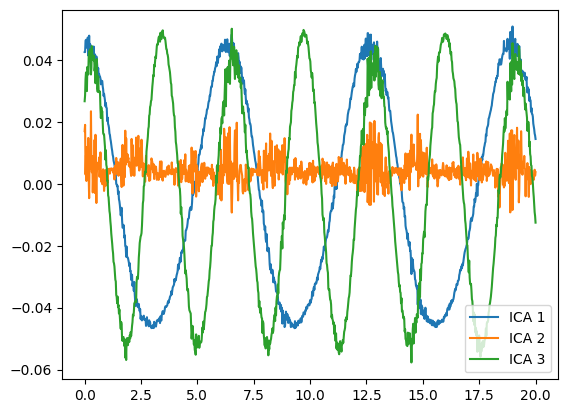

In [132]:
ica = FastICA(whiten="arbitrary-variance")
X_ica = ica.fit_transform(X)

# plt.plot(t, S, "gray")
plt.plot(t, X_ica, label=["ICA 1", "ICA 2", "ICA 3"])
plt.legend()
plt.show()

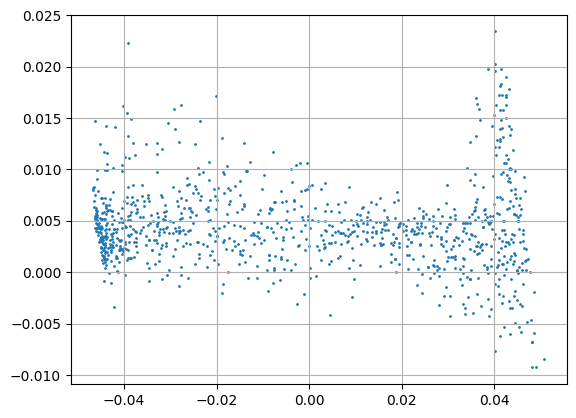

In [136]:
plt.scatter(X_ica[:, 0], X_ica[:, 1], 1)
plt.grid()